In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#Load Dataset
dataset=pd.ExcelFile("./mktgbudget.xlsx")

In [3]:
#Rename Dataset and choose datasheet called mktgbudget
df=dataset.parse('mktgbudget')
df

Month  Spend   Sales
0       1   1000    9914
1       2   4000   40487
2       3   5000   54324
3       4   4500   50044
4       5   3000   34719
5       6   4000   42551
6       7   9000   94871
7       8  11000  118914
8       9  15000  158484
9      10  12000  131348
10     11   7000   78504
11     12   3000   36284

In [4]:
#Create new Dataset without the Months column
df1 = df.iloc[:,1:3]

In [5]:
df1

Spend   Sales
0    1000    9914
1    4000   40487
2    5000   54324
3    4500   50044
4    3000   34719
5    4000   42551
6    9000   94871
7   11000  118914
8   15000  158484
9   12000  131348
10   7000   78504
11   3000   36284

In [6]:
#Show key statstics
df1.describe()

Spend          Sales
count     12.000000      12.000000
mean    6541.666667   70870.333333
std     4293.008763   45654.491312
min     1000.000000    9914.000000
25%     3750.000000   39436.250000
50%     4750.000000   52184.000000
75%     9500.000000  100881.750000
max    15000.000000  158484.000000

In [7]:
#Define x variable
x=df1.iloc[:, :-1].values

In [8]:
#Define y variable
y=df1.iloc[:, 1].values

Text(0,0.5,'Sales')

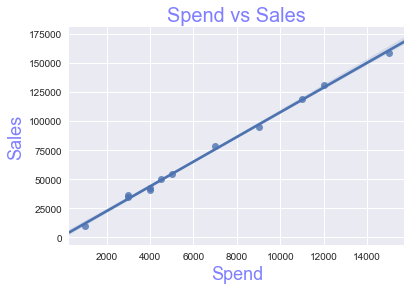

In [9]:
#Visualization
lmgraph=sns.regplot(x=x,y=y)
lmgraph.axes.set_title("Spend vs Sales",size=20,color='blue',alpha=0.5)
lmgraph.set_xlabel("Spend",size=18,color='blue',alpha=0.5)
lmgraph.set_ylabel("Sales",size=18,color='blue',alpha=0.5)

In [10]:
#Load Library for Training dataset
from sklearn.model_selection import train_test_split

In [11]:
#Train dataset using 20% test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [12]:
#Load Linear Regression library
from sklearn.linear_model import LinearRegression

In [13]:
#Load linear regression function
lm=LinearRegression()

In [14]:
#Create linear model
lm=lm.fit(x_train,y_train)

In [15]:
#Show Coef value
lm.coef_

array([10.52515901])

In [16]:
#Show Intercept value
lm.intercept_

2293.554770318049

In [17]:
#Create prediction
y_pred=lm.predict(x_test)

In [18]:
#Forecast Table
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
FcstTble

Actual      Predicted
0  131348  128595.462898
1   94871   97019.985866
2   40487   44394.190813

In [19]:
#Accuracy Score using R2 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.9934324937558472

In [20]:
#Calculate MAE, MSE and RMSE
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  


Mean Absolute Error: 2936.2379269729186
Mean Squared Error: 9153580.266195586
Root Mean Squared Error: 3025.4884343185954
